# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
len(df)

130

In [49]:
max(df.temperature)

100.8

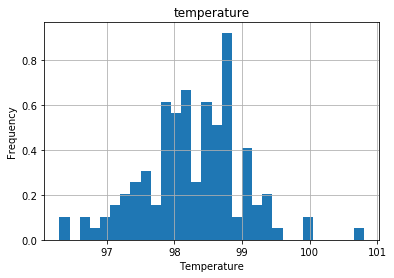

In [19]:
pd.DataFrame.hist(df,column='temperature',bins =30,normed=True)
plt.ylabel('Frequency')
plt.xlabel('Temperature')

##The distribution is normal but it is little bit skewed towards right

In [27]:
temperature = df['temperature']
temp_mean = temperature.mean()
temp_std = temperature.std()
print("Mean ",temp_mean)
print("STD ",temp_std)

Mean  98.24923076923078
STD  0.7331831580389454


In [32]:
from scipy import stats
stats.normaltest(temperature, axis=0)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [35]:
stats.skewtest(temperature)

SkewtestResult(statistic=-0.021370491432771001, pvalue=0.98295011261353815)

In [36]:
stats.kurtosistest(temperature)

KurtosistestResult(statistic=1.6441851280847679, pvalue=0.10013796794683075)

##The -ve value of skew test indiactes that it is skewed towards right

In [37]:
##The sample size is 130 and it is large enough.

##Since the population standard mean is not given.So here T statistic will be used.But as the
of n is greater than 30 and as we know when the value in T table is more than 30 the value 
tends towards z table values.


In [38]:
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

In [48]:
stats.norm.interval(0.99, loc=temp_mean, scale=temp_std)

(96.360676105885531, 100.13778543257602)

In [51]:
from scipy import stats
#stats.zscore(temperature)

# Is the true population mean really 98.6 degrees F?

In [56]:
print("The mean temperature of the sample is : {:.2f}".format(temp_mean))

The mean temperature of the sample is : 98.25


##Null Hypothesis
H0 = 98.6
##Alternate Hypothesis
H1 !=98.6

In [81]:
CI=stats.norm.interval(0.95,loc=temp_mean, 
                    scale=temp_std/sqrt(len(df)))

In [84]:
print("The lower and upper CI is: {:.2f} and {:.2f}".format(CI[0],CI[1]))

The lower and upper CI is: 98.12 and 98.38


In [89]:
z = (98.6 - temp_mean)/(temp_std/sqrt(len(df)))

In [90]:
z

5.454823292364079

##The z = 3.4 in the table has a p value of .0002.So here p value is less than alpha and
hence we can reject the null hypothesis

## At what temperature should we consider someone's temperature to be "abnormal"

In [91]:
CI=stats.norm.interval(0.99,loc=temp_mean, 
                    scale=temp_std/sqrt(len(df)))

In [92]:
CI

(98.083593567992111, 98.414867970469444)

##For the we can calculate the 99% CI.Since our mean is 98.25.So the margin of error is 0.16.
We can conclude that there is 1 in 100 that our True mean doesnot include sample mean.
So (98.08,98.41) can be our threshold

## Is there a significant difference between males and females in normal temperature?

In [95]:
sum(df['gender']=='M')

65

In [98]:
df_male=df[df['gender']=='M']
df_female = df[df['gender']=='F']

In [108]:
male_mean=df_male['temperature'].mean()
male_mean

98.1046153846154

In [113]:
female_mean=df_female['temperature'].mean()
female_mean

98.39384615384613

In [114]:
diff = male_mean - female_mean
diff

-0.289230769230727

##Since the difference in means is not zero so the z score will not be same so null hypothesis 
cannot be true

In [106]:
CI_male=stats.norm.interval(0.95,loc=male_mean, 
                    scale=df_male['temperature'].std()/sqrt(len(df_male)))

In [107]:
CI_male

(97.934745334449985, 98.274485434780814)

In [111]:
CI_female=stats.norm.interval(0.95,loc=female_mean, 
                    scale=df_female['temperature'].std()/sqrt(len(df_female)))

In [112]:
CI_female

(98.213101595213331, 98.574590712478923)

##But we can say that confidence interval slightly overlap.So we cannot say that there is
significant difference between the normal temperature of male and female

In [116]:
df_female['temperature'].std()/sqrt(len(df_female))*1.96

0.1807478799175097

In [117]:
df_male['temperature'].std()/sqrt(len(df_male))*1.96

0.1698731716248031